# Warehouse Demand Analysis 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from numpy.fft import fft

In [4]:
# Load the dataset
file_path = 'Historical Product Demand.csv'  # Update with correct file path
df = pd.read_csv(file_path)

# Data Cleaning and Preprocessing
df.dropna(subset=['Date'], inplace=True)  # Drop rows with missing dates
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Convert 'Date' to datetime
df['Order_Demand'] = pd.to_numeric(df['Order_Demand'].str.replace(r'[^\d.]', '', regex=True), errors='coerce')
df.dropna(subset=['Order_Demand'], inplace=True)  # Remove invalid 'Order_Demand' entries
df.set_index('Date', inplace=True)  # Set 'Date' as the index

In [5]:
# Inspect data
print("Data Preview:")
print(df.head())
print("\nSummary Statistics:")
print(df.describe())
print("\nData Types:")
print(df.dtypes)

Data Preview:
            Product_Code Warehouse Product_Category  Order_Demand
Date                                                             
2012-07-27  Product_0993    Whse_J     Category_028           100
2012-01-19  Product_0979    Whse_J     Category_028           500
2012-02-03  Product_0979    Whse_J     Category_028           500
2012-02-09  Product_0979    Whse_J     Category_028           500
2012-03-02  Product_0979    Whse_J     Category_028           500

Summary Statistics:
       Order_Demand
count  1.037336e+06
mean   4.949384e+03
std    2.907344e+04
min    0.000000e+00
25%    2.000000e+01
50%    3.000000e+02
75%    2.000000e+03
max    4.000000e+06

Data Types:
Product_Code        object
Warehouse           object
Product_Category    object
Order_Demand         int64
dtype: object


In [ ]:
# Visualize the Demand Over Time

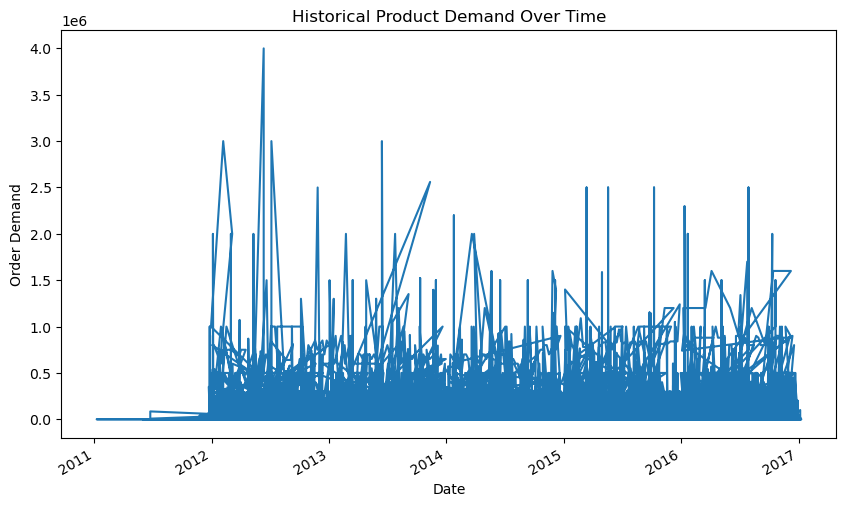

In [6]:
# Visualization of demand over time
plt.figure(figsize=(10, 6))
df['Order_Demand'].plot(title='Historical Product Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Order Demand')
plt.show()

In [ ]:
# Moving Averages for Trend Detection

<Figure size 1000x600 with 0 Axes>

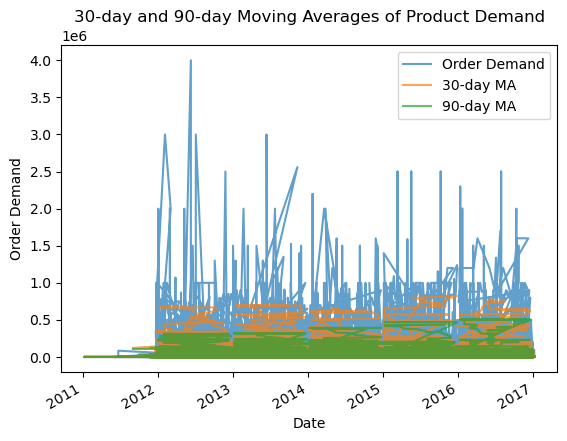

In [7]:
# Moving average to identify trends
df['Demand_MA_30'] = df['Order_Demand'].rolling(window=30).mean()
df['Demand_MA_90'] = df['Order_Demand'].rolling(window=90).mean()

plt.figure(figsize=(10, 6))
df[['Order_Demand', 'Demand_MA_30', 'Demand_MA_90']].plot(alpha=0.7)
plt.title('30-day and 90-day Moving Averages of Product Demand')
plt.xlabel('Date')
plt.ylabel('Order Demand')
plt.legend(['Order Demand', '30-day MA', '90-day MA'])
plt.show()

In [ ]:
# Time Series Decomposition

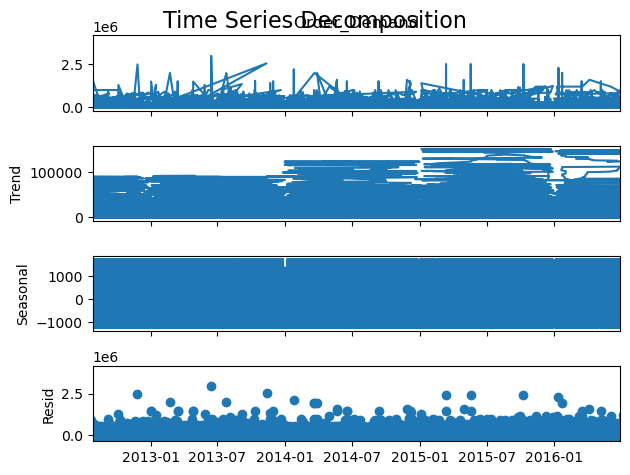

In [8]:
# Decompose the time series (Trend, Seasonality, Residual)
decomposition = seasonal_decompose(df['Order_Demand'], model='additive', period=365)
decomposition.plot()
plt.suptitle('Time Series Decomposition', fontsize=16)
plt.show()

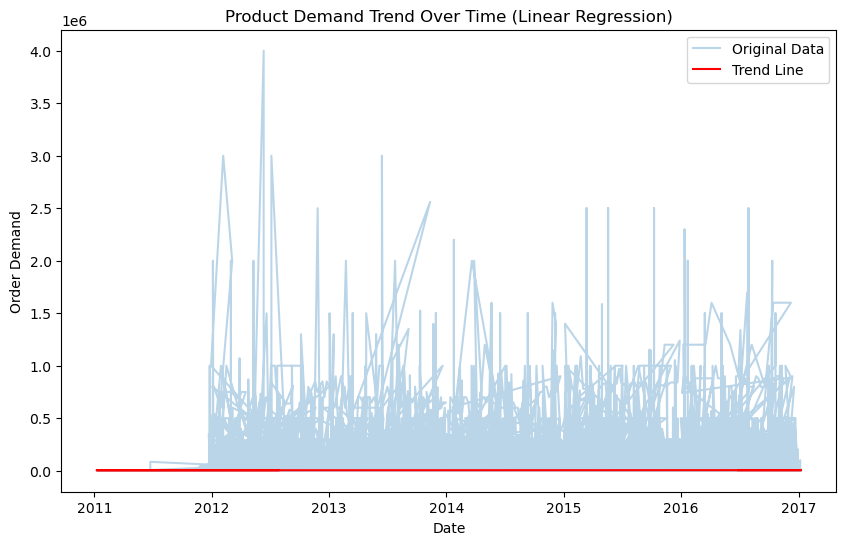

Slope of the trend: 0.4455
Demand Trend:  Increasing


In [9]:
# Detecting the Overall Trend Using Linear Regression
df.reset_index(inplace=True)
df['Date_Ordinal'] = df['Date'].map(pd.Timestamp.toordinal)
X = df[['Date_Ordinal']]
y = df['Order_Demand']

# Fit Linear Regression for trend detection
linear_reg = LinearRegression()
linear_reg.fit(X, y)
df['Trend_Predicted'] = linear_reg.predict(X)

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Order_Demand'], alpha=0.3, label='Original Data')
plt.plot(df['Date'], df['Trend_Predicted'], color='red', label='Trend Line')
plt.title('Product Demand Trend Over Time (Linear Regression)')
plt.xlabel('Date')
plt.ylabel('Order Demand')
plt.legend()
plt.show()

# Print slope of the trend
slope = linear_reg.coef_[0]
print(f"Slope of the trend: {slope:.4f}")
print("Demand Trend: ", "Increasing" if slope > 0 else "Decreasing" if slope < 0 else "Stable")

In [10]:
# Seasonality Detection Using Autocorrelation

<Figure size 1000x600 with 0 Axes>

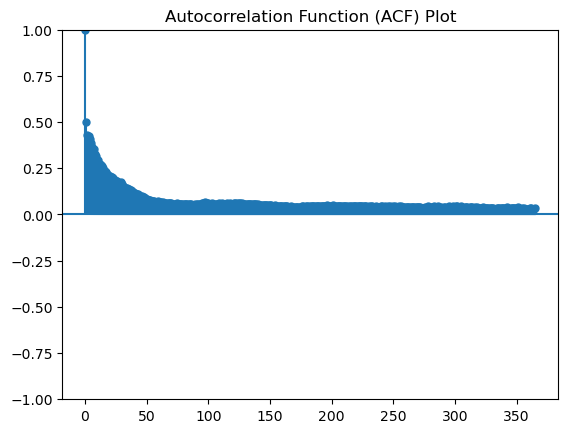

In [11]:
plt.figure(figsize=(10, 6))
plot_acf(df['Order_Demand'].dropna(), lags=365)
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

In [12]:
# Advanced Seasonality Detection Using Fourier Transform

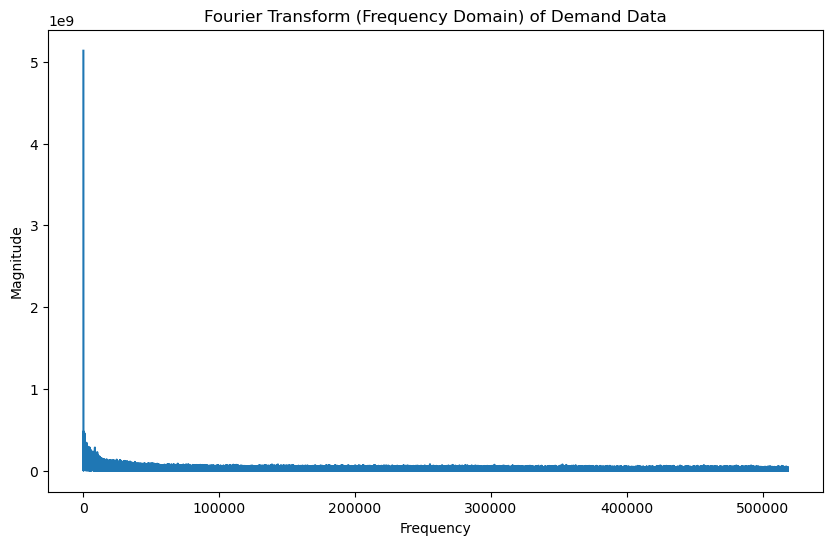

In [13]:
# Fourier Transform for advanced seasonality detection
fft_values = fft(df['Order_Demand'].dropna())
fft_magnitude = np.abs(fft_values)

plt.figure(figsize=(10, 6))
plt.plot(fft_magnitude[:len(fft_magnitude)//2])
plt.title('Fourier Transform (Frequency Domain) of Demand Data')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

In [14]:
# Correlation Matrix for Numeric Columns

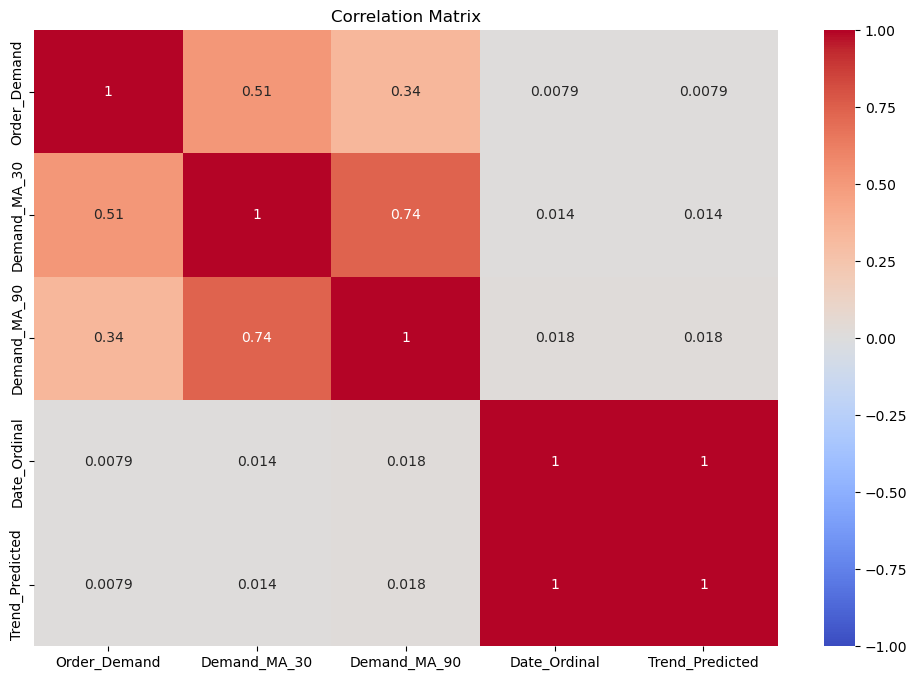


Correlations with Order_Demand:
 Order_Demand       1.000000
Demand_MA_30       0.507943
Demand_MA_90       0.338891
Trend_Predicted    0.007924
Date_Ordinal       0.007924
Name: Order_Demand, dtype: float64


In [15]:
# Correlation matrix for numeric columns
# Convert categorical variables to dummy variables for correlation analysis
if 'Product_Category' in df.columns and 'Warehouse' in df.columns:
    df_encoded = pd.get_dummies(df, columns=['Product_Category', 'Warehouse'], drop_first=True)
    df_numeric = df_encoded.select_dtypes(include=[np.number])
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix')
    plt.show()

    # Display correlations with 'Order_Demand'
    correlations_with_demand = df_numeric.corr()['Order_Demand'].sort_values(ascending=False)
    print("\nCorrelations with Order_Demand:\n", correlations_with_demand)